<a href="https://colab.research.google.com/github/aseempurohit/test-aseem/blob/master/DataPreprocessing_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Playstore Case Study

In this session you’ll be learning data preprocessing with the help of a case study.

### Data Formatting Practices

When storing scraped data in CSV or Excel files, it's important to follow best practices for data formatting to ensure the data is clean, consistent, and easy to work with. Here are the key guidelines for formatting scraped data:
1. Column names should clearly describe the data they contain (e.g., `Product Name`, `Price`, `Rating`).
Use consistent naming conventions such as snake_case or camelCase to avoid spaces, special characters, or mixed capitalisation.
Example: product_name, productPrice.
2. Make sure that numeric fields (e.g., prices, ratings, dimensions) use the same units across the dataset.
Example: $5.99, €4.50 should both be converted to a single currency or labeled as `price_usd`, `price_eur`.
Always store dates in a standard, parsable format (e.g., `YYYY-MM-DD` or `YYYY-MM-DD` `HH:MM:SS`).
Example: Instead of `"August 19, 2024"`, use `2024-08-19`.
If relevant, include time zones in date-time fields to avoid ambiguity.
Example: `2024-09-01` `14:30:00` `UTC+2`.
3. Represent missing data as NaN (Not a Number) or NULL rather than empty strings or inconsistent markers like `N/A`, `-`, or `unknown`.
Example: NaN or null instead of blank spaces or "n/a".
4. Ensure columns that should contain numbers (e.g., `prices`, `ratings`, `counts`) are stored as numeric types rather than strings.
Example: Store 5.99 as a float instead of "5.99" as a string).
5. Ensure special characters like commas, quotes, and newlines in the scraped text data are properly escaped when writing to CSV files.
Example: Use double quotes to escape values with commas: "Product Name, Inc.".
6. Avoid redundant information like repeating the same metadata (e.g., "Scraped on" date) for every row. Instead, this should be stored in the file name or as a comment/metadata at the start of the file.

In [ ]:
#df.to_csv('scraped_data.csv', encoding='utf-8', index=False)

Use a consistent delimiter, typically a comma for CSV files. If your data contains commas within fields, consider using tabs or semicolons as delimiters.

In [ ]:
#df.to_csv('scraped_data.csv', sep=',', index=False)

Excel Format:
Excel allows you to store data across multiple sheets, which can be useful if you have different types of data to store together (e.g., summary data on one sheet, detailed data on another).
Rich Formatting: Excel supports rich formatting (colors, fonts, etc.), but avoid excessive use of formatting features unless needed for analysis or presentation.

In [ ]:
#with pd.ExcelWriter('scraped_data.xlsx') as writer:
    #df.to_excel(writer, sheet_name='Sheet1', index=False)

## **Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?
- Is the performance of the app better on iOS or Android?
- What could be the factors causing the users to uninstall the app?
- Do higher versions of the app promise better performance?
- Does the frequency of updates correlate with the performance of the app?
- Which apps are the most subscribed apps?
- Does the performance vary significantly for Free Versions and Paid versions?
- Which category of apps have maximum usage time?




In [ ]:
#import the libraries
import pandas as pd
import numpy as np

In [ ]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("/content/googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [ ]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [ ]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#Check the percentage of null values in the columns
inp0.isnull().mean()

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [ ]:
#Drop the rows having null values in the Rating field

inp0=inp0[inp0["Rating"].notna()]
#Check the shape of the dataframe
inp0.shape

(9367, 13)

In [ ]:
# Check the number of nulls in the Rating field again to cross-verify
inp0["Rating"].isnull().sum()

np.int64(0)

Checking the number of nulls in the dataframe again and find the total number of null values.

In [ ]:
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Inspecting the nulls in the Android Version column

In [ ]:
inp0[inp0["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
inp0[inp0["Current Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [ ]:
inp0[inp0["Content Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Example

Dropping the row having shifted values

In [ ]:
inp0=inp0.drop(10472)

#Check the nulls again in Android version column to cross-verify
inp0["Android Ver"].isnull().sum()

np.int64(2)

Imputing Missing Values

- For numerical variables, use mean and median
- For categorical variables, use mode

In [ ]:
#Check the most common value in the Android version column
inp0["Android Ver"].mode()[0]

'4.1 and up'

In [ ]:
#Fill up the nulls in the Android Version column with the above value
inp0["Android Ver"]=inp0["Android Ver"].fillna("4.1 and up")

In [ ]:
#Check the nulls in the Android version column again to cross-verify
inp0["Android Ver"].isnull().sum()

np.int64(0)

In [ ]:
#Check the nulls in the entire dataframe again
inp0.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
#Check the most common value in the Current version column
inp0["Current Ver"].mode()

,Current Ver
0,Varies with device


In [ ]:
#Replace the nulls in the Current version column with the above value
inp0["Current Ver"]=inp0["Current Ver"].fillna('Varies with device')

In [ ]:
#Check the nulls in the entire dataframe again
inp0.isnull().sum()

In [ ]:
inp0.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Duplicates

In [ ]:
inp0.shape

(9366, 13)

In [ ]:
len(inp0['App'].unique())

8196

In [ ]:
9366 - 8196

1170

In [ ]:
#To view the rows that are duplicated
duplicated_rows = inp0[inp0.duplicated()]
duplicated_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
# Find duplicated rows considering all columns
duplicated_apps = inp0[inp0.duplicated(keep=False)]['App'].unique()

# Filter the original dataset for rows where 'App' matches duplicated ones
filtered_df = inp0[inp0['App'].isin(duplicated_apps)]
filtered_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up
10188,ESPN Fantasy Sports,SPORTS,4.0,176487,10M,"5,000,000+",Free,0,Everyone,Sports,"November 21, 2017",5.3.0,4.4 and up
10327,Garena Free Fire,GAME,4.5,5534114,53M,"100,000,000+",Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [ ]:
# Find duplicated 'App' values (apps that appear more than once)
duplicated_apps = inp0[inp0.duplicated(subset=['App'], keep=False)]['App'].unique()

# Loop through each duplicated app and print or process its rows
for app in duplicated_apps:
    app_rows = inp0[inp0['App'] == app]
    print(f"Rows for App: {app}")
    print(app_rows)
    print("-" * 40)  # Separator between apps

Rows for App: Coloring book moana
                      App        Category  Rating Reviews Size  Installs  \
1     Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+   
2033  Coloring book moana          FAMILY     3.9     974  14M  500,000+   

      Type Price Content Rating                     Genres      Last Updated  \
1     Free     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2033  Free     0       Everyone  Art & Design;Pretend Play  January 15, 2018   

     Current Ver   Android Ver  
1          2.0.0  4.0.3 and up  
2033       2.0.0  4.0.3 and up  
----------------------------------------
Rows for App: UNICORN - Color By Number & Pixel Art Coloring
                                                 App        Category  Rating  \
36    UNICORN - Color By Number & Pixel Art Coloring  ART_AND_DESIGN     4.7   
7027  UNICORN - Color By Number & Pixel Art Coloring          FAMILY     4.7   

     Reviews Size  Installs  Type Price Content Rating

In [ ]:
#To see all the instances of the duplicated rows
inp0[inp0['App']=='Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [ ]:
# Drop duplicate rows based on 'App', keep the first occurrence
#Since we are assuming, that apps with the same name are not different with its features
#df_unique_apps = inp0.drop_duplicates(subset=['App'], keep='first')

In [ ]:
# Drop duplicate rows based on 'App' and 'Category', keep the first occurrence
df_unique_app_category = inp0.drop_duplicates(subset=['App', 'Category'], keep='first')

In [ ]:
df_unique_app_category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# Detect and remove duplicate rows
#inp0.drop_duplicates(inplace=True)
print(f"Data shape after removing duplicates: {df_unique_app_category.shape}")

Data shape after removing duplicates: (8280, 13)


#### Handling Incorrect Data Types

In [ ]:
#Check the datatypes of all the columns
inp0.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


#### Example

Checking for inconsistent datatypes in the 'Price' column: we calculate the average price of all apps having the Android version as "4.1 and up".

In [ ]:
inp0[inp0["Android Ver"]=="4.1 and up"]["Price"].mean()

TypeError: Could not convert string '00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$1.49$0.9900$0.990$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.990000000000000000000000000' to numeric

In [ ]:
#Analyse the Price column to check the issue
set(inp0["Price"].unique())

{'$0.99',
 '$1.00',
 '$1.20',
 '$1.29',
 '$1.49',
 '$1.50',
 '$1.59',
 '$1.61',
 '$1.70',
 '$1.75',
 '$1.76',
 '$1.97',
 '$1.99',
 '$10.00',
 '$10.99',
 '$11.99',
 '$12.99',
 '$13.99',
 '$14.00',
 '$14.99',
 '$15.46',
 '$15.99',
 '$16.99',
 '$17.99',
 '$18.99',
 '$19.40',
 '$19.99',
 '$2.00',
 '$2.49',
 '$2.50',
 '$2.56',
 '$2.59',
 '$2.90',
 '$2.95',
 '$2.99',
 '$24.99',
 '$29.99',
 '$299.99',
 '$3.02',
 '$3.04',
 '$3.08',
 '$3.28',
 '$3.49',
 '$3.88',
 '$3.90',
 '$3.95',
 '$3.99',
 '$33.99',
 '$37.99',
 '$379.99',
 '$389.99',
 '$39.99',
 '$399.99',
 '$4.29',
 '$4.49',
 '$4.59',
 '$4.60',
 '$4.77',
 '$4.84',
 '$4.99',
 '$400.00',
 '$5.49',
 '$5.99',
 '$6.49',
 '$6.99',
 '$7.49',
 '$7.99',
 '$79.99',
 '$8.49',
 '$8.99',
 '$9.00',
 '$9.99',
 '0'}

The Price column contains a mix of numeric values (e.g., `$2.99`), non-numeric values (e.g., `"Free"`), and symbols (e.g., `dollar signs $`).

In [ ]:
# Ensure the 'Price' column is of string type to apply string operations
inp0['Price'] = inp0['Price'].astype(str)

# Remove dollar signs from Price and convert to float
inp0['Price'] = inp0['Price'].replace('Free', '0')  # Replace 'Free' with '0'
inp0['Price'] = inp0['Price'].str.replace('$', '', regex=False).astype(float)  # Remove dollar sign and convert to float

In [ ]:
inp0[inp0["Android Ver"]=="4.1 and up"]["Price"].mean()

np.float64(0.8191606016496848)

In [ ]:
#Verify the dtype of Price once again
inp0.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [ ]:
#Analyse the Installs Column
inp0["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
# Function to clean and convert Installs values
def clean_installs(installs):
    if isinstance(installs, str):  # Check if the installs value is a string
        try:
            return int(installs.replace("+", "").replace(",", ""))  # Remove '+' and ',' then convert to int
        except ValueError:
            return 0  # Return 0 if the value can't be converted
    else:
        return installs  # If it's already a number, return as is

The `"Installs"` column contains special characters and symbols which makes it difficult to perform any kind of anlysis on the data.

In [ ]:
# Apply the clean_installs function to the 'Installs' column
inp0["Installs"] = inp0["Installs"].apply(clean_installs)

# Now you can verify if the column is cleaned
inp0["Installs"]

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
...,...
10834,500
10836,5000
10837,100
10839,1000


After the data type for 'Installs' column is made consistent, we can perform analysis on the same.

In [ ]:
#Verify the dtype of Price once again
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#find the approximate number of apps at the 50th percentile
inp0["Installs"].describe()["50%"]
#50% of the apps have 500000 installs or below.

500000.0

#### Example

Standardisation

There are 2 techniques for standardisation

1. Normalization ==>  (Column - Mean) / (Std)  - From each value of the column, subtract the column mean, and divide the difference by the column standard deviation. Values will scaled between approx -3 to +3.

2. Minmax Scaler ==> (Column - Min) / (Max - Min) - From each value of the column, subtract the minimum value of the column, and divide the difference by the range of the column which is maximum minus minimum value of the column. Values will scaled between 0 to 1.
   

In [ ]:
tempinp0=inp0.copy()

In [ ]:
tempinp0.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Why is standardisation necessary?

Rating typically ranges from 1 to 5.

Reviews can have a very large range, from 0 to millions.

Size (in MB or KB) can also vary widely across apps.

Without standardisation, these varying scales can affect the performance of statistical models. For example, an algorithm may assign more weight to features like Reviews or Size (because they have larger numerical values) than it would to Rating, even though Rating might be equally or more important.

In [ ]:
set(inp0['Size'].unique())

{'1.0M',
 '1.1M',
 '1.2M',
 '1.3M',
 '1.4M',
 '1.5M',
 '1.6M',
 '1.7M',
 '1.8M',
 '1.9M',
 '10.0M',
 '100M',
 '103k',
 '10M',
 '116k',
 '118k',
 '11M',
 '11k',
 '121k',
 '122k',
 '12M',
 '13M',
 '141k',
 '143k',
 '144k',
 '14M',
 '14k',
 '153k',
 '154k',
 '15M',
 '160k',
 '161k',
 '164k',
 '169k',
 '16M',
 '170k',
 '173k',
 '175k',
 '176k',
 '17M',
 '17k',
 '186k',
 '18M',
 '18k',
 '190k',
 '192k',
 '193k',
 '196k',
 '19M',
 '2.0M',
 '2.1M',
 '2.2M',
 '2.3M',
 '2.4M',
 '2.5M',
 '2.6M',
 '2.7M',
 '2.8M',
 '2.9M',
 '201k',
 '203k',
 '206k',
 '208k',
 '209k',
 '20M',
 '20k',
 '210k',
 '219k',
 '21M',
 '220k',
 '221k',
 '226k',
 '228k',
 '22M',
 '232k',
 '234k',
 '239k',
 '23M',
 '23k',
 '240k',
 '241k',
 '246k',
 '24M',
 '24k',
 '251k',
 '253k',
 '257k',
 '259k',
 '25M',
 '25k',
 '266k',
 '26M',
 '26k',
 '270k',
 '27M',
 '27k',
 '280k',
 '283k',
 '288k',
 '28M',
 '28k',
 '292k',
 '293k',
 '29M',
 '29k',
 '3.0M',
 '3.1M',
 '3.2M',
 '3.3M',
 '3.4M',
 '3.5M',
 '3.6M',
 '3.7M',
 '3.8M',
 '3.9

In [ ]:
from sklearn.preprocessing import StandardScaler
tempinp0 = tempinp0.drop(columns=['Price'])

# 'Size' column is treated as strings and handle NaN values
tempinp0['Size'] = tempinp0['Size'].astype(str).replace('Varies with device', None)
#Remove 'M' (MB) and 'k' (KB) and convert the 'Size' to float (in MB)
tempinp0['Size'] = tempinp0['Size'].str.replace('M', '', regex=False)
tempinp0['Size'] = tempinp0['Size'].str.replace('k', 'e-3', regex=False)
# Convert the cleaned 'Size' values to numeric, forcing non-convertible values to NaN
tempinp0['Size'] = pd.to_numeric(tempinp0['Size'], errors='coerce')

In [ ]:
set(tempinp0['Size'])

{0.375,
 1.5,
 2.5,
 2.0,
 4.0,
 5.5,
 6.0,
 5.0,
 8.7,
 9.2,
 7.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 9.0,
 19.0,
 20.0,
 21.0,
 3.5,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 4.5,
 31.0,
 32.0,
 33.0,
 30.0,
 35.0,
 7.5,
 37.0,
 38.0,
 39.0,
 36.0,
 8.0,
 42.0,
 41.0,
 8.5,
 44.0,
 9.5,
 46.0,
 48.0,
 40.0,
 43.0,
 10.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 51.0,
 59.0,
 58.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 3.0,
 82.0,
 81.0,
 84.0,
 85.0,
 86.0,
 87.0,
 83.0,
 88.0,
 89.0,
 18.0,
 91.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 92.0,
 22.0,
 0.061,
 0.186,
 6.5,
 1.0,
 0.5,
 34.0,
 0.154,
 0.029,
 45.0,
 47.0,
 49.0,
 50.0,
 0.779,
 0.965,
 0.872,
 0.84,
 0.122,
 0.811,
 0.404,
 60.0,
 0.121,
 0.496,
 0.246,
 0.308,
 0.058,
 90.0,
 0.026,
 0.916,
 0.526,
 0.683,
 0.837,
 0.994,
 0.619,
 0.43,
 0.055,
 0.16,
 0.023,
 0.241,
 0.93,


In [ ]:
'6546A', 6546

This step is done to ensure `Size` is converted to string, this enables you to replace or remove characters like `M` and `k`. After that `Size` is converted to float type which returns `NAN` in case of corrupt values.

In [ ]:
# Select numerical columns for standardization
numeric_cols = ['Rating', 'Reviews', 'Size']
# Standardize the data, after handling NaN by dropping or filling (example uses fillna)
tempinp0[numeric_cols] = tempinp0[numeric_cols].fillna(0)
scaler = StandardScaler()
tempinp0[numeric_cols] = scaler.fit_transform(tempinp0[numeric_cols])

tempinp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,-0.178104,-0.163458,0.002388,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,-0.566309,-0.163201,-0.214885,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.986512,-0.135673,-0.445195,5000000,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.598307,-0.094917,0.263116,50000000,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.210102,-0.163201,-0.701578,100000,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Example

Normalisation

In [ ]:
temp2inp0=inp0.copy()

In [ ]:
temp2inp0.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 'Size' column is treated as strings and handle NaN values
temp2inp0['Size'] = temp2inp0['Size'].astype(str).replace('Varies with device', None)
# Standardize the data, after handling NaN by dropping or filling (example uses fillna)
temp2inp0['Size'] = temp2inp0['Size'].fillna('').str.replace('M', '', regex=False)
temp2inp0['Size'] = temp2inp0['Size'].str.replace('k', 'e-3', regex=False)
# Convert the cleaned 'Size' values to numeric, forcing non-convertible values to NaN
temp2inp0['Size'] = pd.to_numeric(tempinp0['Size'], errors='coerce')
temp2inp0['Size'] = temp2inp0['Size'].fillna(0)

This step is done to ensure `Size` is converted to string, this enables you to replace or remove characters like `M` and `k`. After that `Size` is converted to float type which returns `NAN` in case of corrupt values.

In [ ]:
# Select numerical columns for normalization
numeric_cols = ['Rating', 'Reviews', 'Size']
temp2inp0[numeric_cols] = temp2inp0[numeric_cols].fillna(0)
# Normalize the data
scaler = MinMaxScaler()
temp2inp0[numeric_cols] = scaler.fit_transform(temp2inp0[numeric_cols])
temp2inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0.775,0.000002,0.190,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,0.725,0.000012,0.140,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.925,0.001120,0.087,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.875,0.002759,0.250,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.825,0.000012,0.028,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Why is normalisation necessary?

Features often come from different units of measurement (e.g., `"Price"` in dollars and `"Size"` in megabytes). If not normalised, the feature with the larger numeric range might dominate, even though it's not more important.

### Outliers

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable.


Using a box plot you can identify the outliers as follows:

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [ ]:
#import the plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

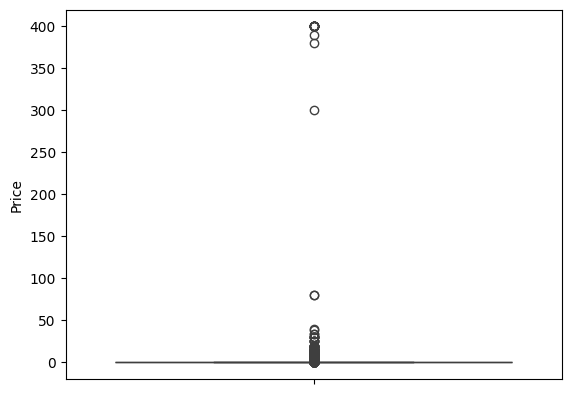

In [ ]:
#Create a box plot for the price column
sns.boxplot(inp0["Price"])
plt.show()

In [ ]:
#Check the apps with price more than 200
inp0[inp0["Price"]>350]["Price"]

,Price
4197,399.99
4362,399.99
4367,400.00
5351,399.99
5354,399.99
5356,399.99
5357,379.99
5358,399.99
5359,399.99
5362,399.99


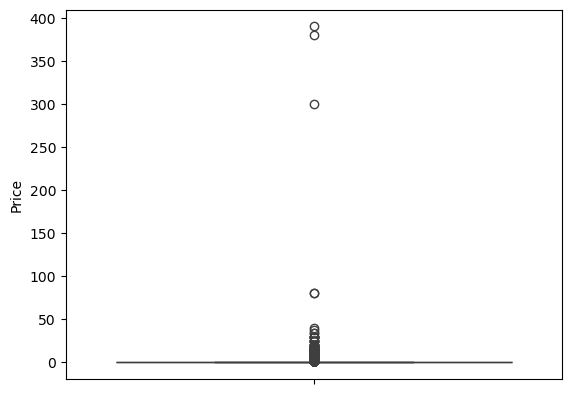

In [ ]:
#Clean the Price column
temp=inp0[inp0["Price"]<399]
sns.boxplot(temp["Price"])
plt.show()

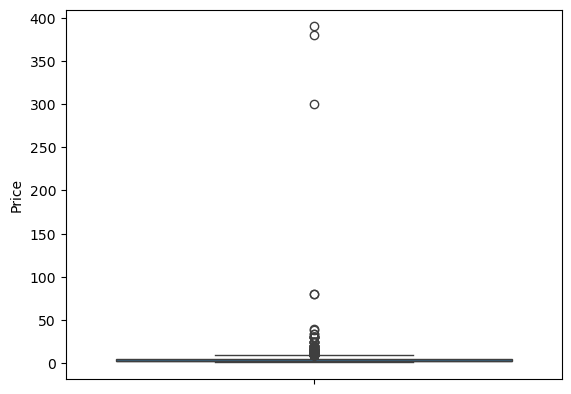

In [ ]:
#Create a box plot for paid apps
temp=temp[temp["Type"]=="Paid"]
sns.boxplot(temp["Price"])
plt.show()

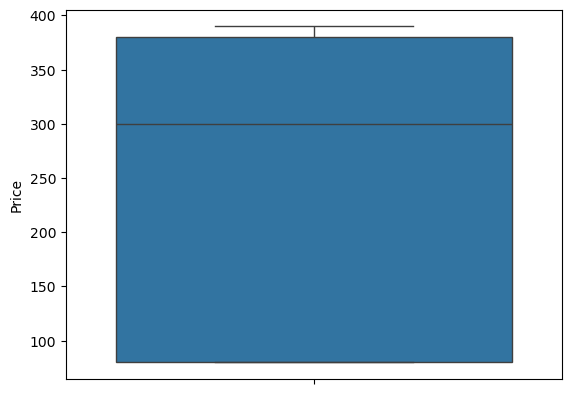

In [ ]:
#Check the apps with price more than 30
temp=temp[temp["Price"]>50]
sns.boxplot(temp["Price"])
plt.show()

#### IQR Method

In [ ]:
# Function to clean the Size column and convert to numeric (handling both 'M' and 'k')
def clean_size(size):
    if isinstance(size, str):  # Check if the size value is a string
        try:
            # Handle 'M' (Megabytes)
            if 'M' in size:
                size = size.replace('M', '')  # Remove 'M' if it's present
                return float(size)
            # Handle 'k' (Kilobytes), converting to Megabytes
            elif 'k' in size:
                size = size.replace('k', '')  # Remove 'k' if it's present
                return float(size) * 1e-3  # Convert kilobytes to megabytes
            else:
                return float(size)  # If no 'M' or 'k', return the float directly
        except ValueError:
            return np.nan  # Return NaN if conversion fails
    else:
        return size  # If it's already a number, return it as is

# Apply the clean_size function to the 'Size' column
inp0["Size"] = inp0["Size"].apply(clean_size)

# Drop rows with NaN values in the 'Size' column (if any)
inp0 = inp0.dropna(subset=["Size"])

# Check if the column is cleaned
print(inp0["Size"].head())

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [ ]:
# Calculate the first quartile (25th percentile)
q1 = inp0["Size"].describe()["25%"]

# Calculate the median (50th percentile) - also known as Q2
q2 = inp0["Size"].describe()["50%"]

# Calculate the third quartile (75th percentile)
q3 = inp0["Size"].describe()["75%"]

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Define lower bound for outliers based on 1.5 * IQR rule
lb = q1 - 1.5 * iqr

# Define upper bound for outliers based on 1.5 * IQR rule
ub = q3 + 1.5 * iqr

# Cap any values greater than the upper bound to the upper bound value
inp0["Size"] = np.where(inp0["Size"] > ub, ub, inp0["Size"])

# Cap any values lower than the lower bound to the lower bound value
inp0["Size"] = np.where(inp0["Size"] < lb, lb, inp0["Size"])

 Outliers often represent abnormal data points or errors. By capping the outliers using upper and lower bounds derived from IQR, we focus on data within a reasonable range, making the analysis more robust and reliable.

In [ ]:
inp0["Size"].describe()

,Size
count,7424.000000
mean,22.031269
std,21.466385
min,0.008500
25%,5.100000
50%,14.000000
75%,33.000000
max,74.850000


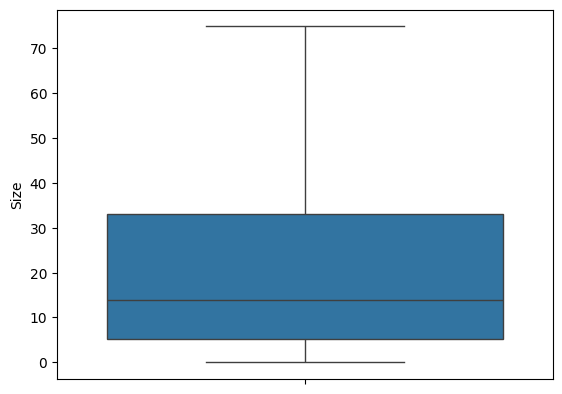

In [ ]:
sns.boxplot(inp0["Size"])
plt.show()

### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between $1$ and $5$ for all the apps.
- Number of reviews is less than or equal to the number of installs.
- Free apps shouldn’t have a price greater than $0$.


In [ ]:
#Perform the sanity checks on the Rating column

# This helps to identify any unexpected or incorrect values in the ratings, such as values outside the valid range (1 to 5).
print(inp0["Rating"].unique())

# This checks if any rating exceeds the expected upper bound (which should be 5).
print(inp0["Rating"].max())

# This checks if any rating is below the expected lower bound (which should be 1 or sometimes 0 if unrated).
print(inp0["Rating"].min())


[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
5.0
1.0


In [ ]:
inp0['Rating'].describe()
inp0['Rating'].value_counts()
inp0 = inp0[(inp0['Rating'] >= 1) & (inp0['Rating'] <= 5)]

You can drop the rows if the ratings are not between 1 and 5. If dropping values reduces too much data, you can fill these with the median or mean rating.

In [ ]:
median_rating = df['Rating'].median()
df.loc[(df['Rating'] < 1) | (df['Rating'] > 5), 'Rating'] = median_rating

In [ ]:
#Perform the sanity checks on the Reviews column
inp0[inp0["Reviews"]>=inp0["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4.0,10,Free,0.00,Everyone,Health & Fitness,"June 13, 2018",3.55,4.0 and up
6700,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7147,CB Heroes,SOCIAL,5.0,5,1.8,5,Free,0.00,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [ ]:
set(inp0['Reviews'].unique())
inp0['Reviews']=pd.to_numeric(inp0['Reviews'], errors="coerce")
inp0['Reviews'].dtypes
inp0['Reviews'].isnull().sum()

In [ ]:
inp0 = inp0[inp0["Reviews"] < inp0["Installs"]]

In [ ]:
inp0.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


If the number of inconsistent rows (i.e. rows where no. of reviews > no. of installs) is small and these rows don't have much significance, you can simply drop them from the dataset.

In [ ]:
#perform the sanity checks on prices of free apps
inp0[inp0["Type"]=="Free"]["Price"].max()

0.0

Identify rows where free apps have a non-zero price.

Correct the data by setting the price to zero for free apps or drop the inconsistent rows.

Verify that all free apps now have a zero price.